In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/BigProject/data/'

import pandas as pd
import numpy as np

# row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

Mounted at /content/drive


### 불필요한 코드

In [14]:
df = pd.read_excel(path + '전체 도시림 조성지.xlsx')

In [15]:
df.head()

,구군,위치
0,강서구,강서구 가락동
1,강서구,강서구 녹산동
2,강서구,강서구 녹산동
3,강서구,강서구 녹산동
4,강서구,강서구 녹산동


In [16]:
li = df['위치'].unique()

In [17]:
len(li)

192

In [7]:
li

array(['강서구 가락동', '강서구 녹산동', '강서구 강동동', '강서구 명지동', '강서구 대저2동',
       '금정구 금사회동동', '금정구 구서1동', '금정구 구서2동', '금정구 부곡3동', '금정구 부곡2동',
       '기장군 장안읍', '기장군 기장읍', '기장군 일광면', '동구 초량3동', '동구 범일2동', '동구 초량2동',
       '동구 수정5동', '동구 좌천동', '동구 범일1동', '동구 수정1동', '동래구 온천2동', '동래구 사직3동',
       '동래구 온천1동', '동래구 수민동', nan, '부산진구 부전1동', '부산진구 전포1동', '부산진구 가야1동',
       '북구 구포3동', '북구 구포1동', '북구 화명2동', '북구 금곡동', '사상구 괘법동', '사상구 덕포2동',
       '사하구 감천1동', '사하구 다대1동', '사하구 구평동~서구 암남동', '서구 서대신3동', '서구 서대신4동',
       '수영구 광안3동', '수영구 수영동', '수영구 민락동', '연제구 연산5동', '중구 영주2동', '중구 영주동',
       '중구 동광동', '중구 중앙동', '해운대구 반여4동', '해운대구 반송1동', '해운대구 중1동',
       '해운대구 좌4동', '금정구 선두구동', '기장군 철마면', '기장군 정관읍', '남구 대연3동', '동래구 복산동',
       '부산진구 초읍동', '북구 만덕2동', '사상구 덕포1동', '사하구 당리동', '사하구 괴정1동',
       '사하구 괴정2동', '서구 암남동', '연제구 거제2동', '해운대구 중2동', '사상구 삼락동',
       '사하구 감천2동', '영도구 동삼1동', '남구 우암동', '남구 용호1동', '남구 용호3동', '남구 대연5동',
       '남구 문현1동', '사상구 주례1동', '사상구 주례2동', '사상구 주례3동', '사상구 감전동',
       '부산진구 연지동', '

In [8]:
df = pd.read_excel(path + '통합데이터_최종.xlsx')

In [10]:
df['is_forest'] = np.where(df['동'].isin(li), 1, 0)
df['is_forest']

0      1
1      1
2      1
3      1
4      0
      ..
201    1
202    1
203    1
204    0
205    0
Name: is_forest, Length: 206, dtype: int64

In [11]:
df['is_forest'].value_counts()

is_forest
1    160
0     46
Name: count, dtype: int64

In [13]:
df.to_excel('통합데이터_타겟.xlsx', index=False)

# 시작

In [2]:
compatibility_df = pd.read_excel(path + '모델링용/통합데이터_적합성.xlsx')
necessity_df = pd.read_excel(path + '모델링용/통합데이터_필요성.xlsx')
compatibility_df.head()

,동,면적,전,답,과수원,목장용지,임야,염전,대,공장용지,학교용지,주차장,주유소용지,창고용지,도로,철도용지,하천,제방,구거,유지,양어장,수도용지,공원,체육용지,유원지,종교용지,사적지,묘지,잡종지,광천지,공장 용지,학교 용지,주유소 용지,창고 용지,철도 용지,수도 용지,체육 용지,종교 용지,세대수,인구수,인구수_남,인구수_여,한국인,한국인_남,한국인_여,외국인,외국인_남,외국인_여,65세 이상 고령자,is_forest
0,강서구 대저1동,17727660.8,1958007.0,4464878.0,4143.0,32293.0,4678.00,0.0,1877084.80,5621.0,80904.00,9829.00,20206.0,7462.0,1374616.00,346343.0,4246501.00,348622.0,823975.0,6552.00,0,0.00,646.00,209808.0,405.0,10474.0,0.0,1173.0,1893440.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3817,7113,3966,3147,6962,3861,3101,151,105,46,2135,1
1,강서구 대저2동,29250833.8,1381832.0,8779395.0,5444.0,180597.0,149.00,0.0,1942425.60,37682.6,64977.00,34658.10,8756.0,120695.9,1545231.90,27715.0,7406824.00,437663.0,1375333.3,33325.60,0,122014.00,67613.80,10352.0,902.0,8234.0,0.0,0.0,5659013.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3685,7741,4361,3380,7493,4145,3348,248,216,32,1631,1
2,강서구 강동동,18488440.3,1074405.2,10201936.7,8996.0,47171.0,25661.00,0.0,1349529.40,568.0,47777.00,762.00,5779.0,14783.0,1017745.00,244.0,3378674.00,143890.0,924788.0,15044.00,11548,0.00,0.00,29354.0,805.0,329.0,0.0,36982.0,151669.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2693,4878,2644,2234,4707,2504,2203,171,140,31,1431,1
3,강서구 명지1동,7821967.8,600907.5,2203423.5,0.0,2812.5,387019.55,226.5,1445321.65,1258.0,121877.35,17787.25,5145.5,2567.5,852750.25,0.0,577969.55,187164.2,313449.2,36716.75,0,2097.95,278444.55,0.0,561.4,9615.4,0.0,2032.5,772819.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,15874,42856,21461,21395,42564,21331,21233,292,130,162,2962,1
4,강서구 명지2동,7821967.8,600907.5,2203423.5,0.0,2812.5,387019.55,226.5,1445321.65,1258.0,121877.35,17787.25,5145.5,2567.5,852750.25,0.0,577969.55,187164.2,313449.2,36716.75,0,2097.95,278444.55,0.0,561.4,9615.4,0.0,2032.5,772819.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,9968,30795,15281,15514,30605,15192,15413,190,89,101,1936,0


### EDA

In [33]:
compatibility_temp = compatibility_df.drop(columns=['동'])
compatibility_temp.corr()['is_forest']

면적            0.121098
전             0.120611
답             0.099619
과수원           0.068595
목장용지          0.091717
임야            0.089210
염전            0.037101
대             0.119585
공장용지          0.064781
학교용지         -0.022746
주차장           0.054598
주유소용지         0.119564
창고용지          0.114913
도로            0.118838
철도용지          0.125173
하천            0.096661
제방            0.080819
구거            0.099618
유지            0.101899
양어장           0.064864
수도용지          0.057351
공원            0.066807
체육용지          0.055571
유원지           0.038319
종교용지          0.066477
사적지          -0.018389
묘지            0.071828
잡종지           0.082322
광천지           0.080886
공장 용지         0.070576
학교 용지         0.086412
주유소 용지        0.086998
창고 용지         0.072267
철도 용지         0.068169
수도 용지         0.070094
체육 용지         0.037449
종교 용지         0.023347
세대수           0.071254
인구수           0.034355
인구수_남         0.041412
인구수_여         0.027416
한국인           0.030992
한국인_남         0.036371
한국인_여      

In [35]:
compatibility_corr = pd.DataFrame(compatibility_temp.corr()['is_forest'])
compatibility_corr.loc[(compatibility_corr['is_forest'] > 0.1) | (compatibility_corr['is_forest'] < -0.1)]

,is_forest
면적,0.121098
전,0.120611
대,0.119585
주유소용지,0.119564
창고용지,0.114913
도로,0.118838
철도용지,0.125173
유지,0.101899
65세 이상 고령자,0.101554
is_forest,1.000000


In [37]:
necessity_temp = necessity_df.drop(columns=['동'])
necessity_temp.corr()['is_forest']

BOD          0.089637
COD          0.120140
TOC          0.122768
SS           0.101905
DO           0.147185
T-P          0.084621
총대장균군        0.059058
분원성대장균군      0.057114
암모니아성질소      0.073887
질산성질소        0.114387
용존총질소        0.102218
인산염인         0.079490
용존총인         0.081879
클로로필A        0.069230
pH분류         0.085077
수온분류        -0.037352
전도분류         0.054437
PM-2.5       0.018564
PM-10       -0.013205
오존           0.000631
일산화탄소        0.087201
일산화질소       -0.019020
이산화황         0.146267
소득          -0.258876
평균_기온        0.237420
최고_기온       -0.097139
최저_기온        0.243826
강수총계        -0.151105
평균 풍속        0.282273
최대 순간풍속      0.226894
is_forest    1.000000
Name: is_forest, dtype: float64

In [38]:
necessity_corr = pd.DataFrame(necessity_temp.corr()['is_forest'])
necessity_corr.loc[(necessity_corr['is_forest'] > 0.1) | (necessity_corr['is_forest'] < -0.1)]

,is_forest
COD,0.120140
TOC,0.122768
SS,0.101905
DO,0.147185
질산성질소,0.114387
용존총질소,0.102218
이산화황,0.146267
소득,-0.258876
평균_기온,0.237420
최저_기온,0.243826


## 모델링(적합성)

In [10]:
X = compatibility_df.drop(columns=['동', 'is_forest'])
y = compatibility_df.loc[:, 'is_forest']

X.shape, y.shape

((206, 48), (206,))

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 여러 모델 import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=5, random_state=24)),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

results = []
names = []

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    cv_results = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
    print(msg)

Logistic Regression: 0.7259 (0.0561)
Decision Tree: 0.7439 (0.0910)
Random Forest: 0.7564 (0.0654)
SVM: 0.7744 (0.0140)
KNN: 0.7500 (0.0484)


In [26]:
model_svm = SVC()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.79      1.00      0.88        33

    accuracy                           0.79        42
   macro avg       0.39      0.50      0.44        42
weighted avg       0.62      0.79      0.69        42

[[ 0  9]
 [ 0 33]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
model_rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=24)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.17      0.11      0.13         9
           1       0.78      0.85      0.81        33

    accuracy                           0.69        42
   macro avg       0.47      0.48      0.47        42
weighted avg       0.65      0.69      0.67        42

[[ 1  8]
 [ 5 28]]


In [25]:
model_knn = KNeighborsClassifier(n_neighbors=5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           1       0.79      0.79      0.79        33

    accuracy                           0.67        42
   macro avg       0.51      0.51      0.51        42
weighted avg       0.67      0.67      0.67        42

[[ 2  7]
 [ 7 26]]


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

# RandomForestClassifier 모델 생성
rf = RandomForestClassifier(class_weight=class_weights_dict)

# 파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200, 300],
    'random_state': [24, 42, 52, 62]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 및 평가
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'max_depth': 7, 'n_estimators': 50, 'random_state': 24}
              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.81      0.91      0.86        33

    accuracy                           0.76        42
   macro avg       0.61      0.57      0.57        42
weighted avg       0.72      0.76      0.73        42

[[ 2  7]
 [ 3 30]]


In [67]:
rf = RandomForestClassifier(class_weight=class_weights_dict)

# 파라미터 그리드 설정
param_grid = {
    'max_depth': [6, 7, 8],
    'n_estimators': [40, 45, 50, 55, 60],
    'random_state': [22, 23, 24, 25, 26]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 및 평가
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found:  {'max_depth': 7, 'n_estimators': 50, 'random_state': 24}
              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.81      0.91      0.86        33

    accuracy                           0.76        42
   macro avg       0.61      0.57      0.57        42
weighted avg       0.72      0.76      0.73        42

[[ 2  7]
 [ 3 30]]


In [70]:
rf = RandomForestClassifier(class_weight=class_weights_dict, max_depth=7, random_state=24)

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': range(46, 56)
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 및 평가
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 54}
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.83      0.91      0.87        33

    accuracy                           0.79        42
   macro avg       0.67      0.62      0.63        42
weighted avg       0.76      0.79      0.77        42

[[ 3  6]
 [ 3 30]]


## 적합성 최종모델

- best_params : max_depth = 7, random_state = 24, n_estimators=54

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

X = compatibility_df.drop(columns=['동', 'is_forest'])
y = compatibility_df.loc[:, 'is_forest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

compatibility_model = RandomForestClassifier(class_weight=class_weights_dict,n_estimators=54, max_depth=7, random_state=24)
compatibility_model.fit(X_train_scaled, y_train)
y_pred_compatibility = compatibility_model.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_compatibility))
print(confusion_matrix(y_test, y_pred_compatibility))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.83      0.91      0.87        33

    accuracy                           0.79        42
   macro avg       0.67      0.62      0.63        42
weighted avg       0.76      0.79      0.77        42

[[ 3  6]
 [ 3 30]]


In [5]:
# 각 트리의 예측값을 확인
predictions = []
for test in X_test_scaled:
    predictions.append(np.array([tree.predict([test]) for tree in compatibility_model.estimators_]))

li_comp = []
# 0과 1의 개수 세기
for prediction in predictions:
    num_ones = np.sum(prediction == 1)
    print(f"필요성: {round(num_ones / 54 * 100, 2)}%")
    li_comp.append(round(num_ones / 54 * 100, 2))

필요성: 92.59%
필요성: 77.78%
필요성: 79.63%
필요성: 55.56%
필요성: 100.0%
필요성: 79.63%
필요성: 94.44%
필요성: 92.59%
필요성: 92.59%
필요성: 100.0%
필요성: 79.63%
필요성: 83.33%
필요성: 85.19%
필요성: 90.74%
필요성: 42.59%
필요성: 53.7%
필요성: 81.48%
필요성: 70.37%
필요성: 81.48%
필요성: 37.04%
필요성: 88.89%
필요성: 88.89%
필요성: 94.44%
필요성: 22.22%
필요성: 62.96%
필요성: 85.19%
필요성: 88.89%
필요성: 96.3%
필요성: 66.67%
필요성: 83.33%
필요성: 87.04%
필요성: 75.93%
필요성: 77.78%
필요성: 94.44%
필요성: 62.96%
필요성: 46.3%
필요성: 87.04%
필요성: 53.7%
필요성: 74.07%
필요성: 33.33%
필요성: 50.0%
필요성: 11.11%


## 모델링(필요성)

In [71]:
X = necessity_df.drop(columns=['동', 'is_forest'])
y = necessity_df.loc[:, 'is_forest']

X.shape, y.shape

((206, 30), (206,))

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 여러 모델 import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=5, random_state=24)),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

results = []
names = []

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    cv_results = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
    print(msg)

Logistic Regression: 0.7684 (0.0406)
Decision Tree: 0.7680 (0.0636)
Random Forest: 0.7744 (0.0305)
SVM: 0.7684 (0.0234)
KNN: 0.7621 (0.0448)


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

# RandomForestClassifier 모델 생성
rf = RandomForestClassifier(class_weight=class_weights_dict)

# 파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200, 300],
    'random_state': [24, 42, 52, 62]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 및 평가
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'max_depth': 3, 'n_estimators': 200, 'random_state': 42}
              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.84      0.82      0.83        33

    accuracy                           0.74        42
   macro avg       0.62      0.63      0.63        42
weighted avg       0.75      0.74      0.74        42

[[ 4  5]
 [ 6 27]]


In [79]:
rf = RandomForestClassifier(class_weight=class_weights_dict, max_depth=3, random_state=42)

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': range(120, 127),
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 및 평가
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters found:  {'n_estimators': 121}
              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.84      0.82      0.83        33

    accuracy                           0.74        42
   macro avg       0.62      0.63      0.63        42
weighted avg       0.75      0.74      0.74        42

[[ 4  5]
 [ 6 27]]


## 필요성 최종모델

- best_params : max_depth = 3, random_state = 42, n_estimators=121

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

X = necessity_df.drop(columns=['동', 'is_forest'])
y = necessity_df.loc[:, 'is_forest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

necessity_model = RandomForestClassifier(class_weight=class_weights_dict,n_estimators=121, max_depth=3, random_state=42)
necessity_model.fit(X_train_scaled, y_train)
y_pred_necessity = necessity_model.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_necessity))
print(confusion_matrix(y_test, y_pred_necessity))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.84      0.82      0.83        33

    accuracy                           0.74        42
   macro avg       0.62      0.63      0.63        42
weighted avg       0.75      0.74      0.74        42

[[ 4  5]
 [ 6 27]]


In [7]:
# 각 트리의 예측값을 확인
predictions = []
for test in X_test_scaled:
    predictions.append(np.array([tree.predict([test]) for tree in necessity_model.estimators_]))

li_necess = []
# 0과 1의 개수 세기
for prediction in predictions:
    num_ones = np.sum(prediction == 1)
    print(f"필요성: {round(num_ones / 121 * 100, 2)}%")
    li_necess.append(round(num_ones / 121 * 100, 2))

필요성: 86.78%
필요성: 57.02%
필요성: 62.81%
필요성: 73.55%
필요성: 80.17%
필요성: 81.82%
필요성: 47.93%
필요성: 91.74%
필요성: 61.98%
필요성: 80.17%
필요성: 79.34%
필요성: 80.17%
필요성: 61.98%
필요성: 75.21%
필요성: 61.98%
필요성: 27.27%
필요성: 57.02%
필요성: 57.02%
필요성: 61.98%
필요성: 5.79%
필요성: 27.27%
필요성: 34.71%
필요성: 66.94%
필요성: 4.13%
필요성: 61.98%
필요성: 57.02%
필요성: 36.36%
필요성: 58.68%
필요성: 34.71%
필요성: 78.51%
필요성: 63.64%
필요성: 84.3%
필요성: 63.64%
필요성: 47.93%
필요성: 78.51%
필요성: 4.13%
필요성: 66.12%
필요성: 67.77%
필요성: 47.93%
필요성: 50.41%
필요성: 4.13%
필요성: 5.79%


In [8]:
result_df = pd.DataFrame({'compatibility': li_comp, 'necessity': li_necess, 'actual': y_test})
result_df.head()

,compatibility,necessity,actual
125,92.59,86.78,1
34,77.78,57.02,1
113,79.63,62.81,1
198,55.56,73.55,0
185,100.00,80.17,0


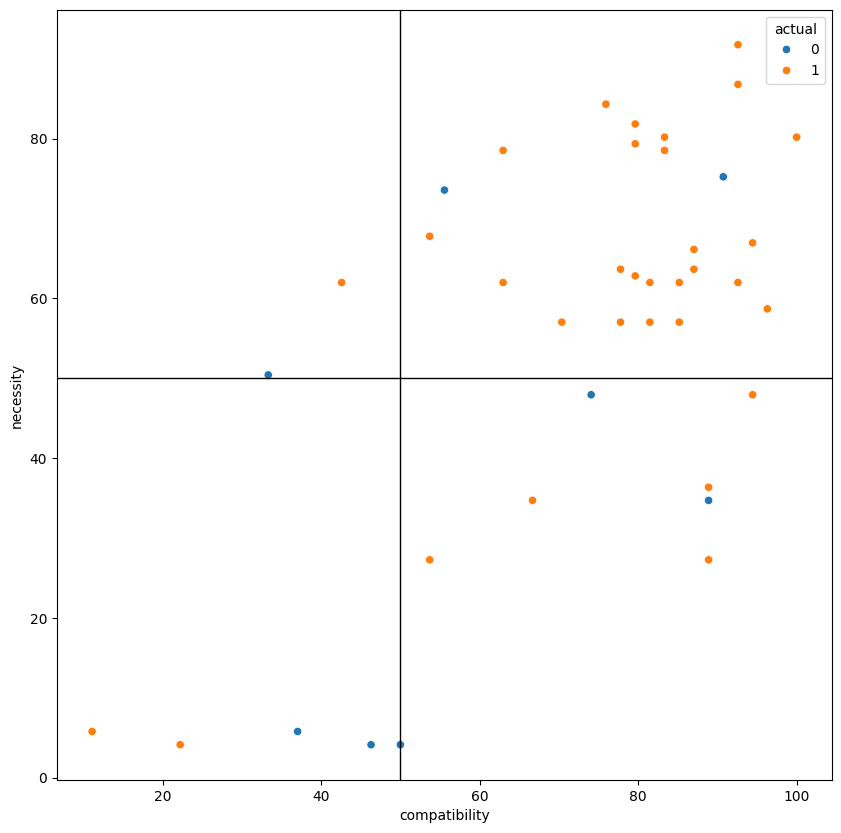

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x='compatibility', y='necessity', data=result_df, hue='actual')
plt.axhline(y=50, linewidth=1, color='black')
plt.axvline(x=50, linewidth=1, color='black')
plt.show()